<a href="https://colab.research.google.com/github/eubrunoosouza/airbnb-exploratory-analysis/blob/main/Analisando_os_Dados_do_Airbnb_EDINBURG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Edinburgh/Escócia*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Edinburgh na Escócia, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv('http://data.insideairbnb.com/united-kingdom/scotland/edinburgh/2021-10-15/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificação do imóvel
* `name` - descrição do nome do imóvel anunciado na plataforma do AirBnB
* `host_id` - número de id do proprietário(anfitrião) do imóvel
* `host_name` - nome do anfitrião do imóvel
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro/vizinhaça da localidade
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada de longitude da propriedade
* `room_type`	- informação sobre o tipo de quarto oferecido
* `price` - preço de aluguel do imóvel
* `minimum_nights` - quantidade de noites minímas de acomodação
* `last_review`	- data da última avaliação do imóvel
* `reviews_per_month` - número de reviews por mês
* `calculated_host_listings_count` - quantidades de propriedades de um mesmo anfitrião
* `availability_365` - números de dias de disponibilidade para aluguel do imóvel dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire home/apt,90,3,360,2020-08-28,5.31,1,269,22,NaN
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,3,228,2019-09-08,1.97,1,0,11,NaN
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94215,-3.09640,Entire home/apt,45,4,57,2018-08-27,0.93,2,303,1,NaN
3,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96612,-3.17184,Private room,31,2,205,2021-08-15,1.67,2,12,6,NaN
4,54188,The Four Sisters Boatel,253850,Natalie,NaN,Dalry and Fountainbridge,55.94217,-3.20863,Entire home/apt,179,1,36,2017-01-01,0.56,2,272,5,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 6146
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É preciso se fazer uma análise preliminiar após a importação do dataset, verificar a quantidade de valores nulos e se estes são relevantes comparados ao total de entradas.



*   É possível ver que as colunas `neighbourhood_group` e `license`possuem 100% dos seus valores ausentes, nulos.
*   Logo em seguida temos que as variáveis `last_review` e `reviews_per_month` possuem pouco mais do que 10% de seus valores nulos.
*   A variável `host_name` possui uma quantidade muito pequena de dados ausentes.





In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)


license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.111292
last_review                       0.111292
host_name                         0.000325
longitude                         0.000000
name                              0.000000
host_id                           0.000000
neighbourhood                     0.000000
latitude                          0.000000
room_type                         0.000000
number_of_reviews_ltm             0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para ter uma visualização inicial da distribução das variáveis, irei plotar o histograma.

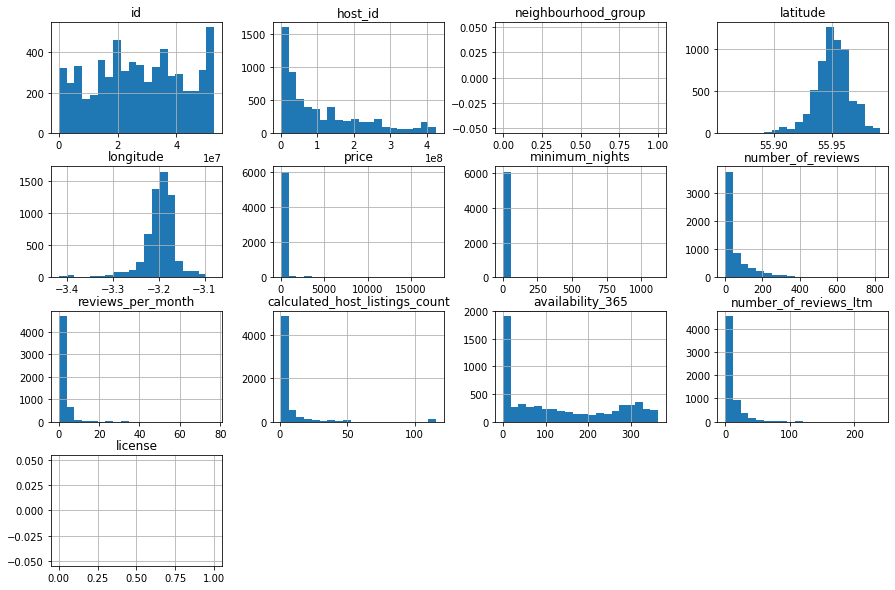

In [ ]:
# plotar o histograma das variáveis numéricas

df.hist(bins=20, figsize=(15,10));

In [ ]:
# verificação de outliers

df[['price','minimum_nights','number_of_reviews','reviews_per_month',
   'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6146.000000,6146.000000,6146.000000,5462.000000,6146.00000,6146.000000
mean,184.488773,4.364302,61.985519,2.013213,7.03547,131.059551
std,729.983800,30.909509,92.770313,2.892681,17.34203,125.357151
min,0.000000,1.000000,0.000000,0.010000,1.00000,0.000000
25%,58.000000,1.000000,4.000000,0.450000,1.00000,2.000000
50%,89.000000,2.000000,23.000000,1.300000,1.00000,94.000000
75%,135.000000,3.000000,82.000000,2.757500,5.00000,258.000000
max,17921.000000,1124.000000,831.000000,77.000000,116.00000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

*   A variável `price` possui 75% do valor abaixo de 135, porém o seu valor máximo é de 17921.
*   A quantidade mínima de noite (`minimum_nights`) está acima de 365 dias no ano.



## Boxplot para minimum_nights



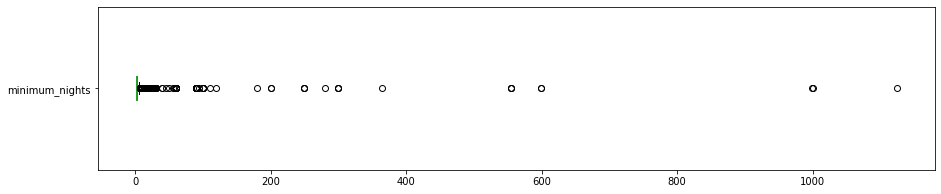

In [ ]:
# minimum_nights

df.minimum_nights.plot(kind='box', figsize=(15,3), vert=False);


In [ ]:
# ver quantidade de valores acima de 30 dias para minimum_nights

print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


minimum_nights: valores acima de 30:
54 entradas
0.8786%


## Boxplot para price


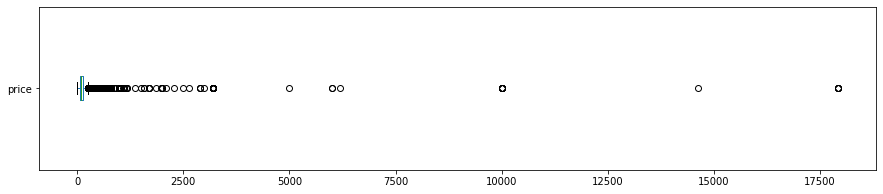


price: valores acima de 1500
89 entradas
1.4481%


In [ ]:
# price

df.price.plot(kind='box', vert=False, figsize=(15,3));
plt.show()

# ver a quantidade de valores acimade 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# Limpeza de dados

continuar a limpeza de dados

In [ ]:
# eliminando colunas com dados nulos não relevantes

df_clean = df.copy()

df_clean.drop(['neighbourhood_group', 'license'], axis=1, inplace=True)

# removendo os outliers - Posso remover uma vez que é uma parte pequena no dataset

df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)

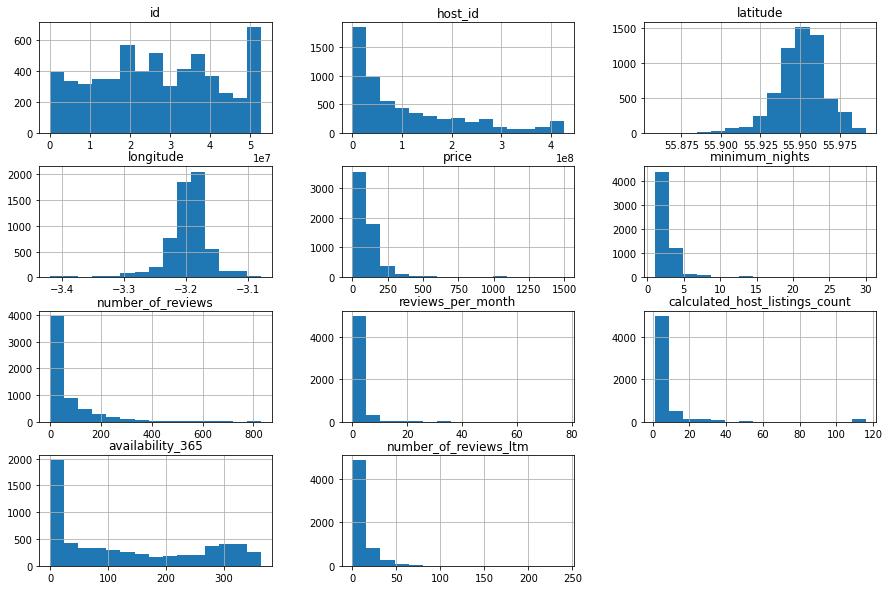

In [ ]:
# plotando  o histograma das variáveis numéricas

df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price`

media_de_precos = df_clean.price.mean()

print("A média de preços dos aluguéis é de {:.2f}".format(media_de_precos))


A média de preços dos aluguéis é de 119.49


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.016758,-0.116474,-0.070835,0.068911,0.136475
minimum_nights,-0.016758,1.000000,-0.044613,-0.082693,-0.053345,-0.077799
number_of_reviews,-0.116474,-0.044613,1.000000,0.417770,-0.075686,0.041090
reviews_per_month,-0.070835,-0.082693,0.417770,1.000000,0.004997,0.040210
calculated_host_listings_count,0.068911,-0.053345,-0.075686,0.004997,1.000000,0.133069
availability_365,0.136475,-0.077799,0.041090,0.040210,0.133069,1.000000


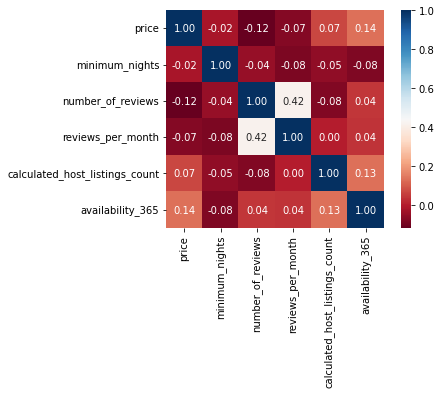

In [ ]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
df_clean.room_type.value_counts()

Entire home/apt    4087
Private room       1797
Hotel room           95
Shared room          26
Name: room_type, dtype: int64

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível

most_frequent_rent = df_clean.room_type.value_counts()
print("O tipo de imóvel mais alguado é o 'Entire home/apt' com {}".format(most_frequent_rent[0]))

O tipo de imóvel mais alguado é o 'Entire home/apt' com 4087


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.673283
Private room       0.307029
Hotel room         0.015457
Shared room        0.004230
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
The Calders                           512.428571
South Leith                           214.204082
Canonmills and New Town North         176.327103
Murrayburn and Wester Hailes North    171.571429
South Gyle                            168.200000
New Town West                         167.532110
Balerno and Bonnington Village        160.578947
Abbeyhill                             159.475248
Deans Village                         152.014164
Dalmeny, Kirkliston and Newbridge     148.526316
Name: price, dtype: float64

Aqui observamos que as localicades com os aluguéis mais caros, em média, são de The Calders e South Leith.

In [ ]:
# Verificar a quantidade de imóveis dos 2 primeiros bairros

print(df_clean[df_clean.neighbourhood == 'The Calders'].shape)
print(df_clean[df_clean.neighbourhood == 'South Leith'].shape)

(14, 16)
(98, 16)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2065,19536606,Edinburgh 2 bedroom house free parking,125296161,Andrew,The Calders,55.91664,-3.28840,Entire home/apt,81,2,107,2019-09-29,2.75,1,233,21
2463,21998435,Private Stylish Room in Edinburgh,105290948,Ana,The Calders,55.92073,-3.29396,Private room,9,5,3,2020-08-22,0.07,9,0,0
2465,22011721,Private Cozy Room in Edinburgh,105290948,Ana,The Calders,55.92210,-3.29248,Private room,20,10,5,2019-08-31,0.11,9,22,0
2466,22016823,Private Cozy Single Bedroom in Edinburgh,105290948,Ana,The Calders,55.92019,-3.29346,Private room,14,14,9,2018-04-30,0.89,9,10,4
4086,35786881,Edinburgh family flat,171843460,Nicolae,The Calders,55.91954,-3.29813,Entire home/apt,45,2,18,2019-08-19,0.67,1,0,12
4263,36635821,Double,272200535,Isaac,The Calders,55.92191,-3.29269,Private room,999,1,4,2019-09-13,0.15,11,365,0
4337,36994344,A,272200535,Isaac,The Calders,55.92056,-3.29422,Private room,999,1,2,2020-01-31,0.07,11,365,0
4746,40753489,1,272200535,Isaac,The Calders,55.91994,-3.29752,Private room,990,1,2,2020-02-09,0.10,11,365,0
4747,40758181,1,272200535,Isaac,The Calders,55.91977,-3.29970,Private room,998,3,2,2020-01-26,0.09,11,365,0
5047,44032092,Spacious room in a clean flat near Heriot-Watt...,105290948,Ana,The Calders,55.92170,-3.29223,Private room,12,14,2,2021-06-27,0.18,9,0,2


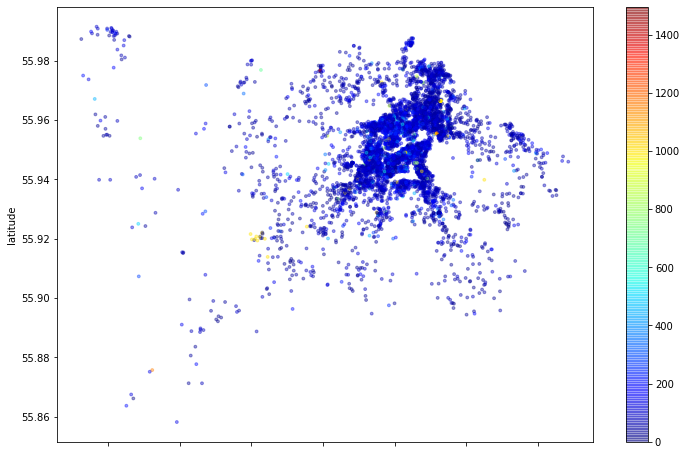

In [ ]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

media_noites_minimas = df_clean.minimum_nights.mean()

print("A média do mínimo de noites para alguel é de cerca {:.2f} noites".format(media_noites_minimas))

A média do mínimo de noites para alguel é de cerca 2.54 noites


## Conclusões
